# Clustering

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>
##  Prototype-based - Clustering: K-means

In [5]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=150,
                n_features=2,
                centers=3,
                cluster_std=0.5,
                shuffle=True,
                random_state=0)

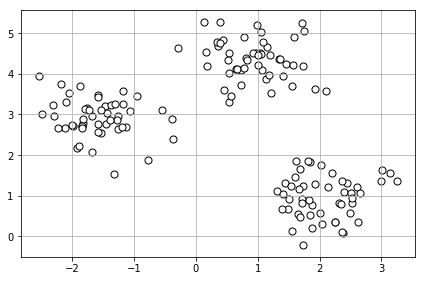

In [6]:
plt.scatter(X[:,0], X[:,1], c='white', marker='o', s=50, edgecolors='black')
plt.grid()
plt.tight_layout()
plt.show()

In [7]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
           init='random',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

y_km = km.fit_predict(X)

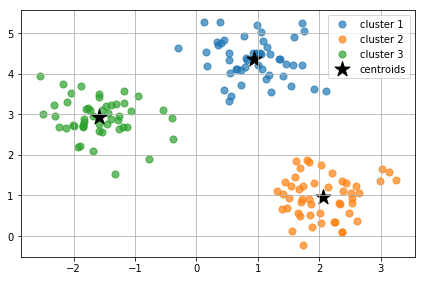

In [8]:
for i in range(km.n_clusters):
    plt.scatter(X[y_km == i, 0],
                X[y_km == i, 1],
                s=50,
                alpha=.7,
                label='cluster %i' %(i+1))

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='black',
            label='centroids')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

<br>
## Elbow Method to Find Number of Clusters

In [135]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
               init='random',
               n_init=10,
               max_iter=300,
               tol=1e-04,
               random_state=0)
    y_km = km.fit_predict(X)
    distortions.append(km.inertia_)

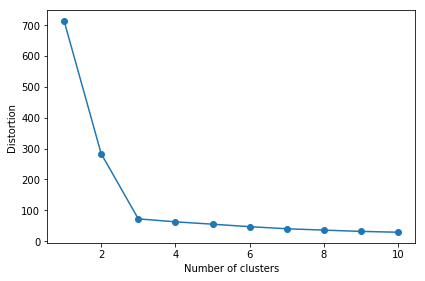

In [138]:
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

<br>
## Silhouette Plots - Quantifying the quality of clustering

In [51]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

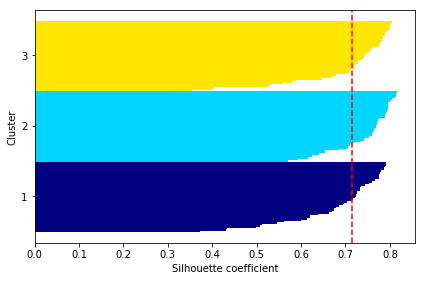

In [63]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhoutte_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhoutte_vals = silhoutte_vals[y_km==c]
    c_silhoutte_vals.sort()
    y_ax_upper += len(c_silhoutte_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper), c_silhoutte_vals, height=1,
            edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhoutte_vals)
    
silhoutte_average = np.mean(silhoutte_vals)
plt.axvline(silhoutte_average, color='red', linestyle='--')
plt.yticks(yticks,cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

#### A bad example

In [69]:
km = KMeans(n_clusters=2,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

y_km = km.fit_predict(X)

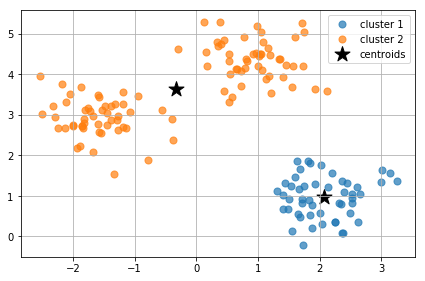

In [70]:
for i in range(km.n_clusters):
    plt.scatter(X[y_km == i, 0],
                X[y_km == i, 1],
                s=50,
                alpha=.7,
                label='cluster %i' %(i+1))

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='black',
            label='centroids')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

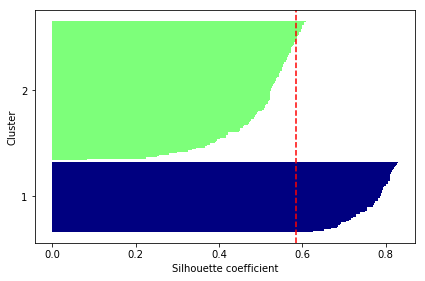

In [72]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhoutte_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhoutte_vals = silhoutte_vals[y_km==c]
    c_silhoutte_vals.sort()
    y_ax_upper += len(c_silhoutte_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper), c_silhoutte_vals, height=1,
            edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhoutte_vals)
    
silhoutte_average = np.mean(silhoutte_vals)
plt.axvline(silhoutte_average, color='red', linestyle='--')
plt.yticks(yticks,cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

<br>
## Hierarchical Clustering

#### Agglomerative clustering using the complete linkage approach

In [80]:
np.random.seed(123)
 
variables = ['X', 'Y', 'Z']
labels = ['ID_0' ,'ID_1' ,'ID_2' ,'ID_3' ,'ID_4']

X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, index=labels, columns=variables)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [87]:
from scipy.spatial.distance import pdist,squareform
row_dist = pd.DataFrame(squareform(pdist(X,metric='euclidean')),
                        columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


We can either pass a condensed distance matrix (upper triangular) from the pdist function, or we can pass the "original" data array and define the metric='euclidean' argument in linkage. However, we should not pass the squareform distance matrix, which would yield different distance values although the overall clustering could be the same.

In [104]:
from scipy.cluster.hierarchy import linkage
# 1.way (Condensed distance matrix)
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters, columns = ['row label 1','row label 2', 'distance', 'no of items in the clust'],
            index = ['cluster %i' % (i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no of items in the clust
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [107]:
# 2. way (Input sample matrix)
row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters, columns = ['row label 1','row label 2', 'distance', 'no of items in the clust'],
            index = ['cluster %i' % (i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no of items in the clust
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


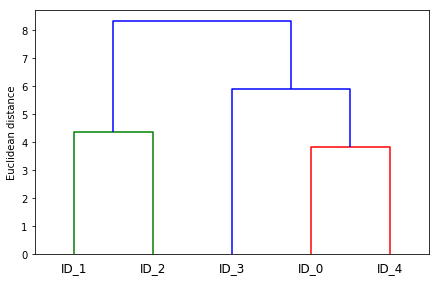

In [110]:
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters,
                      labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

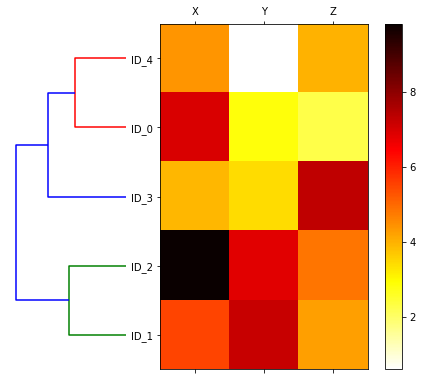

In [117]:
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')
row_dendr
# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
        i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

#### Appying agglomerative clustering with scikit-learn

In [123]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)
print 'Cluster labels:' , labels

Cluster labels: [0 1 1 0 0]


<br>
## Density-based Clustering : Locating regions of high density via DBSCAN (clustering data of arbitrary shapes)

One of the main advantages of using DBSCAN is that it does not assume that the 
clusters have a spherical shape as in k-means. Furthermore, DBSCAN is different 
from k-means and hierarchical clustering in that it doesn't necessarily assign each 
point to a cluster but is capable of removing noise points.

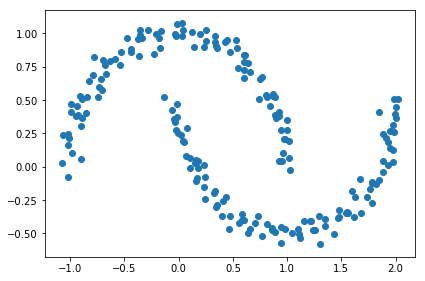

In [138]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:,0],X[:,1])
plt.tight_layout()
plt.show()

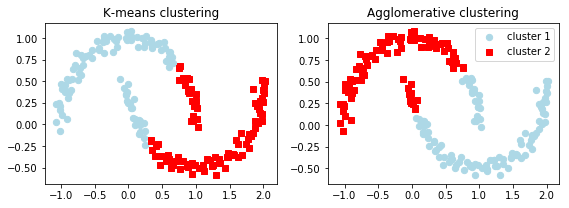

In [145]:


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
plt.show()

#### Density-based clustering

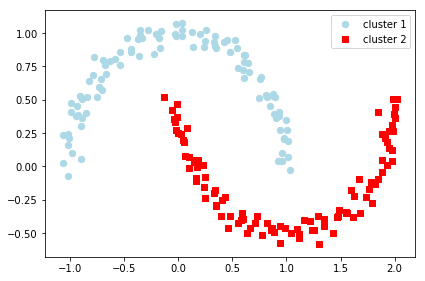

In [151]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], c='lightblue',
            marker='o', s=40, label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], c='red',
            marker='s', s=40, label='cluster 2')
plt.legend()
plt.tight_layout()
plt.show()